In [7]:
# # from pydantic import BaseModel, Field
# # from typing import TypedDict, List, Literal
# # from langchain_openai import ChatOpenAI
# # from langchain.schema import SystemMessage, HumanMessage, AIMessage
# # from langgraph.graph import StateGraph, START, END
# # import json
# # import re
# # from dotenv import load_dotenv
# # load_dotenv()

# # class ChatTemplateConstants:
# #     BEGIN_OF_TEXT = "<|begin_of_text|>"
# #     START_HEADER_ID = "<|start_header_id|>"
# #     END_HEADER_ID = "<|end_header_id|>"
# #     EOT_ID = "<|eot_id|>"

# # def get_message_info(message):
# #     # 딕셔너리 형태인 경우
# #     if isinstance(message, dict):
# #         return message.get('role'), message.get('content')
# #     # 메시지 객체인 경우 (LangChain 스타일)
# #     if hasattr(message, 'role') and hasattr(message, 'content'):
# #         return message.role, message.content
# #     # 타입별 처리 (일반적인 메시지 객체들)
# #     message_type = type(message).__name__.lower()
# #     if 'system' in message_type:
# #         role = 'system'
# #     elif 'human' in message_type or 'user' in message_type:
# #         role = 'user'
# #     elif 'ai' in message_type or 'assistant' in message_type:
# #         role = 'assistant'
# #     else:
# #         # 기본값으로 role 속성 또는 type에서 추출 시도
# #         role = getattr(message, 'role', 'user')
# #     content = getattr(message, 'content', str(message))
# #     return role, content

# # def apply_chat_template(state_messages, turns=3, add_generation_prompt=None, system_message=None, include_human=True, include_ai=True):
# #     messages = []
# #     for msg in state_messages[-turns:]:
# #         if msg["type"] == "human" and include_human:
# #             messages.append(HumanMessage(content=msg["content"]))
# #         elif msg["type"] == "ai" and include_ai:
# #             messages.append(AIMessage(content=msg["content"]))

# #     template = ChatTemplateConstants.BEGIN_OF_TEXT
# #     has_system = False
# #     if messages:
# #         first_role, first_content = get_message_info(messages[0])
# #         has_system = first_role == 'system'

# #     if system_message or has_system:
# #         system_content = system_message if system_message else first_content
# #         template += (
# #             ChatTemplateConstants.START_HEADER_ID + "system" + ChatTemplateConstants.END_HEADER_ID + "\n\n" +
# #             system_content + ChatTemplateConstants.EOT_ID
# #         )
# #         if has_system:
# #             messages = messages[1:]

# #     if add_generation_prompt is None:
# #         if messages:
# #             last_role, _ = get_message_info(messages[-1])
# #             add_generation_prompt = last_role in ['user', 'human']
# #         else:
# #             add_generation_prompt = True

# #     for message in messages:
# #         role, content = get_message_info(message)
# #         template += (
# #             ChatTemplateConstants.START_HEADER_ID + role + ChatTemplateConstants.END_HEADER_ID + "\n\n" +
# #             content + ChatTemplateConstants.EOT_ID
# #         )

# #     if add_generation_prompt:
# #         template += (
# #             ChatTemplateConstants.START_HEADER_ID + "assistant" + ChatTemplateConstants.END_HEADER_ID + "\n\n"
# #         )
# #     return template
    
# # # 상태 정의
# # class ConversationState(TypedDict):
# #     messages: List[dict]
# #     topic: str
# #     constraints: str
# #     goal: str

# def user_assessment_node(state: ConversationState) -> ConversationState:
# #     system_prompt = f'''### 역할
# # 당신은 LearnMate AI (러닝메이트 AI) 입니다.
# # 자신만의 맞춤형 학습 멘토로써 사용자와의 대화를 통해 현재 상태를 파악하는것을 목표로 합니다.

# # ### 현재 사용자 정보
# # - 공부하고자 하는 주제: {state.get('topic', '미파악')}
# #   (사용자가 학습하고자 하는 전반적인 분야나 영역을 나타냅니다. 예: 프로그래밍, 영어, 자격증 등)
# # - 제약 조건: {state.get('constraints', '미파악')}
# #   (사용자가 학습 시 고려해야 할 구체적인 제한사항 또는 환경 조건입니다. 예: 시간, 수준, 장비, 장소 등)
# # - 목표: {state.get('goal', '미파악')}
# #   (해당 주제에서 사용자가 구체적으로 배우고 싶거나 달성하고자 하는 목표나 활동입니다. 예: 웹 개발자가 되고 싶다, 영어 회화 능력을 키우고 싶다)

# # ### 대화 기록
# # {state.get('messages', '')}

# # ### 규칙
# # 1. 사용자 정보에서 '미파악'된 정보를 얻기 위해 사용자 정보와 대화 기록을 바탕으로 이야기하세요.
# # 2. 현재 사용자 정보 중 '미파악' 정보만 한 대화에서 1-2개만 자연스럽게 질문하세요.
# # 3. 친근하고 격려하는 톤을 사용하세요.

# # ### 첫 인사 가이드라인
# # - LearnMate AI로 자신을 소개하세요
# # - 어떤 것을 공부하고 싶은지 자연스럽게 물어보세요
# # - 맞춤형 학습 계획을 만들어드린다는 점을 강조하세요
# # '''

# #     # 모델 응답
# #     prompt = apply_chat_template(state["messages"], turns=3, system_message=system_prompt)
# #     response = llm.invoke(prompt)
# #     state["messages"].append({"type": "ai", "content": response.content})
# #     print("🤖 ", response.content)

# #     # 유저 응답
# #     user_input = input("👤  ")
# #     state["messages"].append({"type": "human", "content": user_input})

# #     return state

# class UserInfoSchema(BaseModel):
#     topic: str = Field(
#         default="",
#         description=(
#             "사용자가 공부하고자 하는 전반적인 주제나 분야를 나타냅니다. "
#             "예: 프로그래밍, 영어, 자격증 등. "
#             "더 구체적인 학습 목표나 하고 싶은 활동은 별도의 'goal' 필드에 기록됩니다."
#         )
#     )
#     constraints: str = Field(
#         default="",
#         description=(
#             "사용자가 명확하게 언급한 구체적인 제약 조건(예: 시간, 환경, 수준 등). "
#             "일반적인 행위나 동사는 포함하지 말고, "
#             "구체적인 제약 사항이 없으면 빈 문자열로 둡니다."
#         )
#     )
#     goal: str = Field(
#         default="",
#         description="사용자가 해당 주제에서 구체적으로 배우고 싶거나 하고 싶은 활동, 목표 등"
#     )
    
# def extract_user_info_node(state: ConversationState) -> ConversationState:
#     # system prompt 간결하게 처리
#     system_prompt = f'''### 역할
# 당신은 LearnMate AI 입니다. 다음 대화 기록을 바탕으로 아래 JSON 스키마에 맞게 사용자 정보를 추출하세요.

# ### 규칙
# 1. 사용자가 언급한 모든 주요 정보 항목들을 핵심 키워드 또는 명사 형태로 간결하게 추출하세요.
# 2. 특정 정보가 명확하게 언급되지 않았다면 해당 항목은 빈 문자열("")로 출력하세요.
# 3. 불필요한 설명이나 추론은 하지 마시고, 있는 정보만 정확히 반영하세요.
# 4. 항상 JSON 형식으로 출력하며, 모든 필드(있는 것, 없는 것)를 포함하세요.

# ### 대화 기록
# '''
#     prompt = apply_chat_template(state["messages"], turns=3, include_ai=False, system_message=system_prompt)

#     # 모델을 pydantic 스키마 바인딩해 구조화 출력 생성
#     model_with_structure = llm.with_structured_output(UserInfoSchema)
#     structured_output = model_with_structure.invoke(prompt)

#     # 값 추출 후 state 반영
#     state['topic'] = structured_output.topic
#     state['constraints'] = structured_output.constraints
#     state['goal'] = structured_output.goal

#     # AI 응답 메시지 기록에 포함 (선택적)
#     state["messages"].append({"type": "ai", "content": str(structured_output)})

#     return state

# # # LLM 초기화
# # llm = ChatOpenAI(
# #     base_url="http://localhost:11434/v1",
# #     api_key="ollama",
# #     model="Midm-2.0-Mini-Instruct-Q4_K_M",
# #     temperature=0.7,
# #     max_tokens=1024,
# # )


# # # StateGraph 생성
# # workflow = StateGraph(ConversationState)

# # # 노드 추가
# # workflow.add_node("user_input", user_assessment_node)
# # workflow.add_node("extract_user_info_node", extract_user_info_node)

# # # 엣지 추가
# # workflow.add_edge(START, "user_input")
# # workflow.add_edge("user_input", "extract_user_info_node")
# # workflow.add_edge("extract_user_info_node", END)

# # # 그래프 컴파일
# # app = workflow.compile()

In [6]:
from pydantic import BaseModel, Field
from typing import TypedDict, List, Literal
from langchain_openai import ChatOpenAI
from langchain.schema import SystemMessage, HumanMessage, AIMessage
from langgraph.graph import StateGraph, START, END
import json
import re
from dotenv import load_dotenv
load_dotenv()

class ChatTemplateConstants:
    BEGIN_OF_TEXT = "<|begin_of_text|>"
    START_HEADER_ID = "<|start_header_id|>"
    END_HEADER_ID = "<|end_header_id|>"
    EOT_ID = "<|eot_id|>"

def get_message_info(message):
    if isinstance(message, dict):
        return message.get('role'), message.get('content')
    if hasattr(message, 'role') and hasattr(message, 'content'):
        return message.role, message.content
    message_type = type(message).__name__.lower()
    if 'system' in message_type:
        role = 'system'
    elif 'human' in message_type or 'user' in message_type:
        role = 'user'
    elif 'ai' in message_type or 'assistant' in message_type:
        role = 'assistant'
    else:
        role = getattr(message, 'role', 'user')
    content = getattr(message, 'content', str(message))
    return role, content

def apply_chat_template(state_messages, turns=10, system_message=None):
    template = ChatTemplateConstants.BEGIN_OF_TEXT
    
    # 시스템 메시지 처리
    if system_message:
        template += (
            ChatTemplateConstants.START_HEADER_ID + "system" + ChatTemplateConstants.END_HEADER_ID + "\n\n" +
            system_message + ChatTemplateConstants.EOT_ID
        )
    
    # 최근 메시지들만 처리
    for msg in state_messages[-turns:]:
        if msg["type"] == "human":
            role = "user"
        elif msg["type"] == "ai":
            role = "assistant"
        else:
            continue
            
        template += (
            ChatTemplateConstants.START_HEADER_ID + role + ChatTemplateConstants.END_HEADER_ID + "\n\n" +
            msg["content"] + ChatTemplateConstants.EOT_ID
        )
    
    # 마지막이 user 메시지면 assistant 프롬프트 추가
    if state_messages and state_messages[-1]["type"] == "human":
        template += (
            ChatTemplateConstants.START_HEADER_ID + "assistant" + ChatTemplateConstants.END_HEADER_ID + "\n\n"
        )
    
    return template

def history(messages_list):
    try:
        rename = {"ai": "assistant", "human": "user"}
        text = '\n'.join([f"{rename[i['type']]}:{i['content']}" for i in messages_list])
        return text
    except:
        return ''
    
# 상태 정의
class ConversationState(TypedDict):
    messages: List[dict]
    topic: str
    constraints: str
    goal: str

def user_assessment_node(state: ConversationState) -> ConversationState:
    prompt = f'''### 역할
당신은 LearnMate AI (러닝메이트 AI) 입니다.
자신만의 맞춤형 학습 멘토로써 사용자와의 대화를 통해 현재 상태를 파악하는것을 목표로 합니다.

### 대화 기록
{history(state.get('messages', ''))}

### 현재 사용자 정보
- 공부하고자 하는 주제: {state.get('topic', '미파악')}
  (사용자가 학습하고자 하는 전반적인 분야나 영역을 나타냅니다. 예: 프로그래밍, 영어, 자격증 등)
- 제약 조건: {state.get('constraints', '미파악')}
  (사용자가 학습 시 고려해야 할 구체적인 제한사항 또는 환경 조건입니다. 예: 시간, 수준, 장비, 장소 등)
- 목표: {state.get('goal', '미파악')}
  (해당 주제에서 사용자가 구체적으로 배우고 싶거나 달성하고자 하는 목표나 활동입니다. 예: 웹 개발자가 되고 싶다, 영어 회화 능력을 키우고 싶다)

### 지시사항
현재 사용자 정보에서 '미파악'된 정보를 얻기 위해 사용자 정보와 대화 기록을 바탕으로 이야기하세요.
'''
    response = llm.invoke(prompt)
    state["messages"].append({"type": "ai", "content": response.content})
    print("🤖 ", response.content)

    # 유저 응답
    user_input = input("👤  ")
    state["messages"].append({"type": "human", "content": user_input})

    return state

class UserInfoSchema(BaseModel):
    topic: str = Field(
        default="",
        description=(
            "사용자가 공부하고자 하는 전반적인 주제나 분야를 나타냅니다. "
            "예: 프로그래밍, 영어, 자격증 등. "
            "더 구체적인 학습 목표나 하고 싶은 활동은 별도의 'goal' 필드에 기록됩니다."
        )
    )
    constraints: str = Field(
        default="",
        description=(
            "사용자가 명확하게 언급한 구체적인 제약 조건(예: 시간, 환경, 수준 등). "
            "일반적인 행위나 동사는 포함하지 말고, "
            "구체적인 제약 사항이 없으면 빈 문자열로 둡니다."
        )
    )
    goal: str = Field(
        default="",
        description="사용자가 해당 주제에서 구체적으로 배우고 싶거나 하고 싶은 활동, 목표 등"
    )
    
def extract_user_info_node(state: ConversationState) -> ConversationState:
    system_prompt = f'''### 역할
당신은 LearnMate AI 입니다. 다음 대화 기록을 바탕으로 아래 JSON 스키마에 맞게 사용자 정보를 추출하세요.

### 규칙
1. 사용자가 언급한 모든 주요 정보 항목들을 핵심 키워드 또는 명사 형태로 간결하게 추출하세요.
2. 특정 정보가 명확하게 언급되지 않았다면 해당 항목은 빈 문자열("")로 출력하세요.
3. 불필요한 설명이나 추론은 하지 마시고, 있는 정보만 정확히 반영하세요.
4. 항상 JSON 형식으로 출력하며, 모든 필드(있는 것, 없는 것)를 포함하세요.

### 대화 기록
'''
    prompt = apply_chat_template(state["messages"], system_message=system_prompt)

    # 모델을 pydantic 스키마 바인딩해 구조화 출력 생성
    model_with_structure = llm.with_structured_output(UserInfoSchema)
    structured_output = model_with_structure.invoke(prompt)

    # 값 추출 후 state 반영
    state['topic'] = structured_output.topic
    state['constraints'] = structured_output.constraints
    state['goal'] = structured_output.goal

    return state

def check_completion(state):
    print("check_completion")
    print("topic:",state.get('topic'))
    print("constraints:",state.get('constraints'))
    print("goal:",state.get('goal'))
    print("=="*20)
    if state.get('topic') and state.get('constraints') and state.get('goal'):
        return True
    else:
        return False

# LLM 초기화
llm = ChatOpenAI(
    base_url="http://localhost:11434/v1",
    api_key="ollama",
    model="midm-2.0-base-q8",
    temperature=0.7,
    max_tokens=1024,
)

# StateGraph 생성
workflow = StateGraph(ConversationState)

# 노드 추가
workflow.add_node("user_assessment_node", user_assessment_node)
workflow.add_node("extract_user_info_node", extract_user_info_node)

# 엣지 추가
workflow.add_edge(START, "user_assessment_node")
workflow.add_edge("user_assessment_node", "extract_user_info_node")
workflow.add_conditional_edges(
    "extract_user_info_node",
    check_completion,
    {
        True: END,
        False: "user_assessment_node",
    },
)

# 그래프 컴파일
app = workflow.compile()

In [ ]:
def tool_1(messege):
    '''
    너는 ~처음 대화~~
    '''
    # 그래프 컴파일
    app = workflow.compile()
    
    state_json = app.steam(messege)

    return state_json

In [ ]:
# 실행
initial_state = {
    "messages": [],
}
final_state = app.invoke(initial_state)

🤖  안녕하세요! 저는 LearnMate AI로 여러분의 맞춤형 학습 멘토입니다. 어떤 분야에 대해 공부하고 싶으신가요? 그리고 현재 어떤 제약 조건이 있거나 목표가 있으신지 알려주시면 더 적합한 도움을 드릴 수 있을 것 같습니다. 혹시 구체적으로 배우고 싶은 내용이나 이루고 싶은 목표가 있으시면 편하게 말씀해 주세요! 😊


In [4]:
final_state

{'messages': [{'type': 'ai',
   'content': '저는 LearnMate AI이며, 다양한 주제에 대해 학습하고자 하는 사용자에게 최적의 교육 경로를 제공하는 것이 목표입니다. 현재 사용자가 공부하고자 하는 주제나 영역이 무엇인지, 그리고 어떤 제약 조건이나 원하는 목표에 대한 구체적인 정보가 필요합니다. 혹시 현재 공부하고 싶은 분야에 대해 말씀해 주시겠어요?'},
  {'type': 'human', 'content': '나는 파이썬 공부하고 싶어'},
  {'type': 'ai',
   'content': '사용자분께서 파이썬 공부를 원한다고 하셨군요! 파이썬은 정말 다양한 분야에서 활용되는 매력적인 프로그래밍 언어죠. 어떤 방향으로 파이썬 학습을 시작하고자 하시는지 알려주시면, 더 구체적인 경로를 제안해드릴 수 있을 것 같습니다.\n\n어떤 상황이나 목표에 맞는 파이썬 학습을 염두에 두고 계신지 궁금합니다. 예를 들어, 웹 개발, 데이터 분석, 인공지능 관련 프로젝트, 혹은 일반적인 프로그래밍 능력 향상 등 다양한 분야가 있을 수 있겠죠?'},
  {'type': 'human', 'content': '나는 웹 개발 프로젝트를 하고 싶어'},
  {'type': 'ai',
   'content': '웹 개발 프로젝트에 관심이 있으시군요! 파이썬은 웹 개발에서 특히 백엔드 부분에서 매우 유용한 언어로 많이 사용되고 있습니다. 그럼, 더 구체적으로 어떤 종류의 웹 개발 프로젝트를 생각하고 계신지 조금 더 말씀해 주실 수 있을까요? 예를 들어, 간단한 블로그 사이트나 온라인 쇼핑몰, 혹은 특정 라이브러리나 프레임워크 사용을 염두에 두고 계신가요?'},
  {'type': 'human', 'content': '간단한 블로그 사이트를 만들고 싶어'},
  {'type': 'ai',
   'content': '파이썬을 사용해 간단한 블로그 사이트를 만들고자 하시는군요! 정말 흥미로운 목표네요. 웹 개발에 관심이 있으시다면, 현재 어느 정도

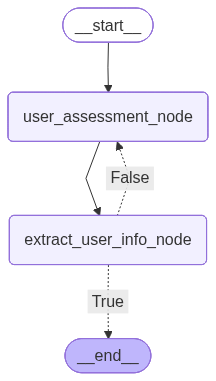

In [5]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    pass